In [1]:
from pysead.Frame_2D import Frame_2D
from pysead.Frame_2D import Member_2D
import numpy as np

Positive Values for forces: right, up (righthand rule)
Negative moment = clockwise, Positive moment = counter-clockwise (righthand rule)
For adding Local Member Load: Axial Load is always parallel to the member local axis
For adding Local Member Load: Loading is always point downward towards the frame element and is considered positive
Member Forces: at left end to right end (based on local axis) - [Axial, Shear, Bending]. Local Axis is governed for positive/negative values. Right is positive, upward is positive, counterclockwise is positive
Frame Reactions: [horizontal, vertical, Moment]. horizontal - right is positive, vertical - upward is positive, moment - counterclockwise is positive


In [2]:
M1 = Member_2D(member_number = 1,
               nodes = {1:[0,3], 2:[2,0]},
               area = 4e-2,
               inertia = 1e-6,
               elasticity = 200_000_000)
M2 = Member_2D(member_number = 2,
               nodes = {2:[2,0], 3:[6,0]},
               area = 4e-2,
               inertia = 1e-6,
               elasticity = 200_000_000)
M2.Add_Load_Full_Uniform(8)

Frame = Frame_2D()
Frame.Compile_Frame_Member_Properties([M1,M2])
Frame.supports = {1:[1,1,1], 3:[1,1,1]}
Frame.Solve()

In [3]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [-6.103163230805786e-06, -1.4092534930867936e-05, -0.02528396244117304],
 3: [0.0, 0.0, 0.0]}

In [4]:
Frame.local_member_forces

{1: array([0, 0, 0, 0, 0, 0]),
 2: array([  0.        ,  16.        ,  10.66666667, -16.        ,
         16.        , -10.66666667])}

In [5]:
Frame.solved_member_forces

{1: array([-18.50540205,  -2.33324395,  -2.80381345,  18.50540205,
          2.33324395,  -5.60881724]),
 2: array([-12.20632646,  -1.89682565,  -5.05784943,  12.20632646,
          1.89682565,  -2.52945318])}

In [6]:
Frame.local_member_forces_solved_

{1: array([-18.50540205,  -2.33324395,  -2.80381345,  18.50540205,
          2.33324395,  -5.60881724]),
 2: array([-12.20632646,  14.10317435,   5.60881724,  -3.79367354,
         17.89682565, -13.19611985])}

In [7]:
Frame.displacements_

{1: [0.0, 0.0, 0.0],
 2: [-6.103163230805786e-06, -1.4092534930867936e-05, -0.02528396244117304],
 3: [0.0, 0.0, 0.0]}

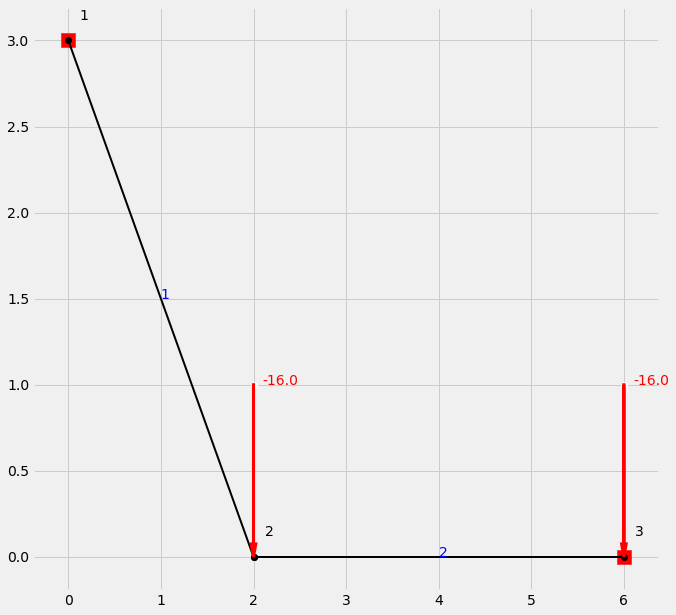

In [8]:
Frame.Draw_Frame_Setup(figure_size=[10,10], arrow_line_width=3)

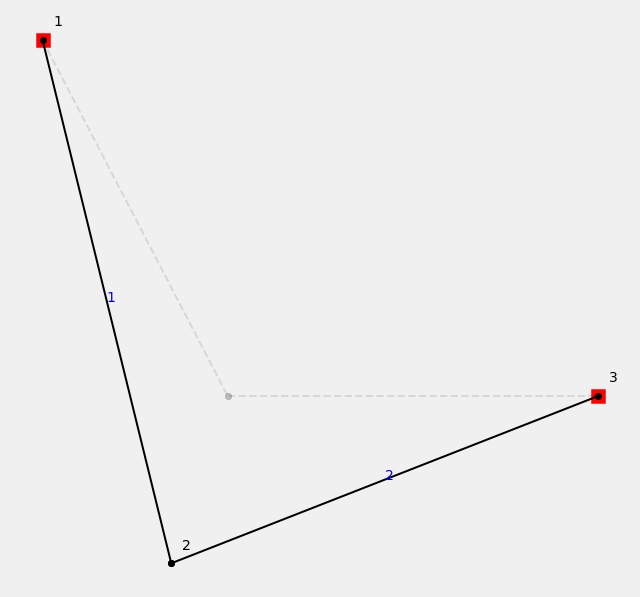

In [9]:
Frame.Draw_Frame_Displacements(figure_size=[10,10], magnification_factor=100000)

In [10]:
Frame.reactions_

array([-12.20633,  14.10317,  -2.80381,   0.     , -16.     , -10.66667,
        12.20633,   1.89683,  -2.52945])

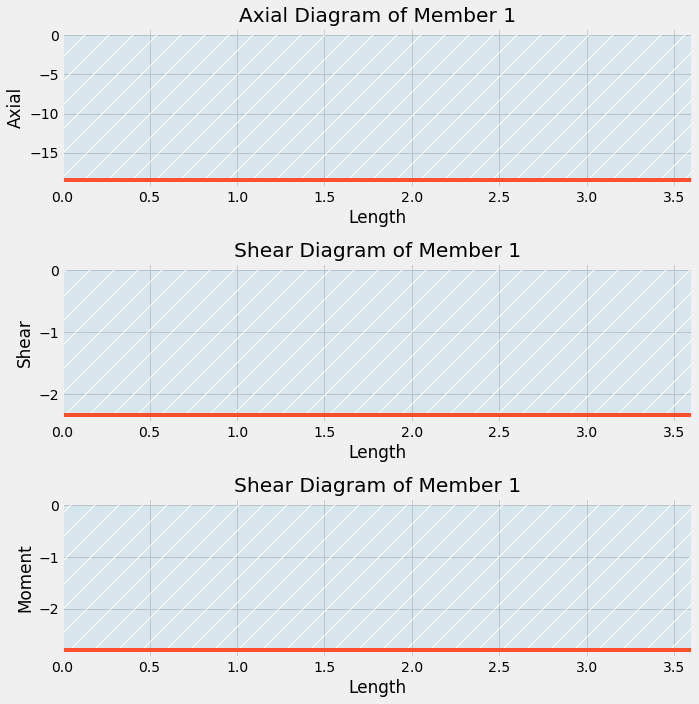

In [11]:
M1.Plot_Diagrams()

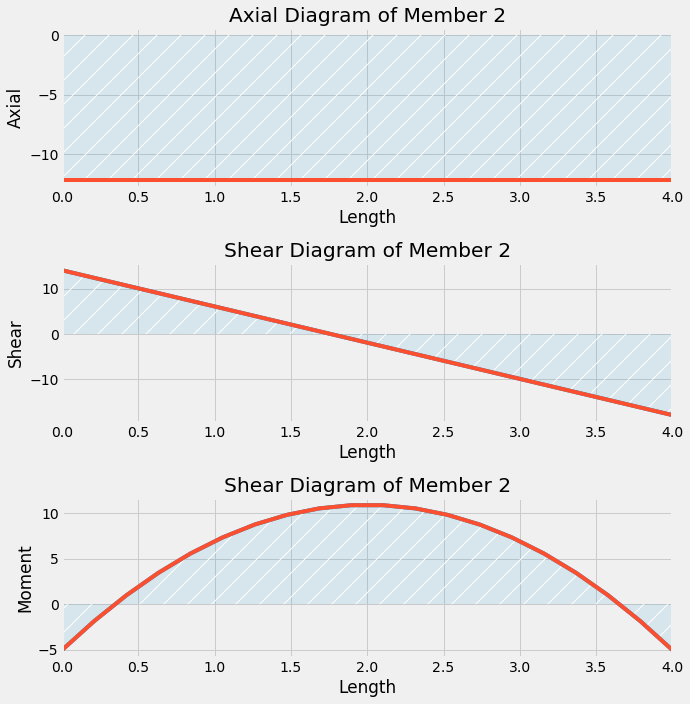

In [12]:
M2.Plot_Diagrams()